# Welcoming Metrics Model (The Elizabeth Model)


# Activity:
- Issue Age: https://chaoss.community/metric-issue-age/
- Issue Response Time: https://chaoss.community/metric-issue-response-time/
- Time to First Response https://chaoss.community/metric-time-to-first-response/ https://chaoss.community/metric-issue-resolution-duration

# Community Culture
- Code of Conduct: https://chaoss.community/metric-code-of-conduct/
- Inclusive Leadership: https://chaoss.community/metric-inclusive-leadership/ 

# Licensing:
- License Coverage https://chaoss.community/metric-license-coverage/
- License Declared https://chaoss.community/metric-license-declared/ 

# Stability:
- CII Best Practices Badge https://chaoss.community/metric-cii-best-practices-badge/
- Test Coverage: https://chaoss.community/metric-test-coverage/
- Bus Factor: https://chaoss.community/metric-bus-factor/
- Committers: https://chaoss.community/metric-committers/
- Elephant Factor: https://chaoss.community/metric-elephant-factor/

# Code
- New contributors
- Change request acceptance rates

In [1]:
import requests
import json
from IPython.display import Image, display
from IPython.display import HTML as html_print
import requests
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from matplotlib.pyplot import figure

import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from requests import request

r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration')
# r.json()

## Activity

In [2]:
import requests
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/issue-throughput')
# r.json()


In [3]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd

r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration', method='get')
e = r.json()
e
data=[]
for response in e: 
  if ( response.get('diffdate')> 79.0 ):
    data.append({
        "repo_id": response.get('repo_id'),
        "repo_name": response.get('repo_name'),
        "diffdate": response.get('diffdate'),
        "gh_issue_number": response.get('gh_issue_number'),
        # "closed_at": response.get('closed_at'),
        # "created_at": response.get('created_at'),
        
    })
df=pd.DataFrame(data)
df.sort_values(by=['diffdate'], inplace=True, ascending=False)
#print(df)

### Issue Age


(10.0, 460.0)

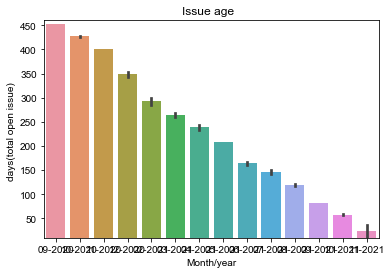

In [4]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# import pandasql as ps
from numpy import count_nonzero
import seaborn as sns
r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-open-age', method='get')
e = r.json()
df=pd.DataFrame(e)
# print(df) 
# df['date'] = pd.DatetimeIndex(df['date']).month
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S')
df['date'] = df['date'].dt.strftime('%m-%Y')
ax = sns.barplot(x="date", y="open_date", data=df)
ax.set(xlabel="Month/year", ylabel = "days(total open issue) ", title = "Issue age  ")
sns.set(rc = {'figure.figsize':(15,15)})
plt.ylim(10, 460)


### Issue Response Time

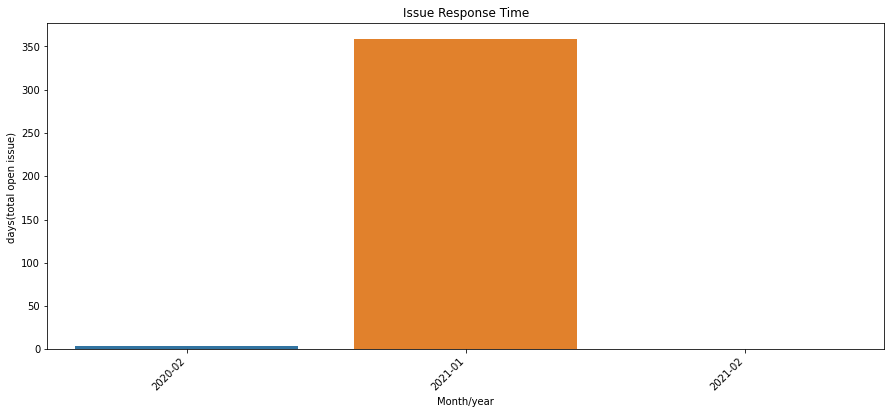

In [2]:
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json


warnings.filterwarnings('ignore')

with open("../../comm_cage.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})


repolist = pd.DataFrame() 
repo_query = salc.sql.text(f"""select  f.created_at, avg(f.first_response) from 
(
select e.repo_id, date_trunc('month',e.created_at) as created_at, e.first_response  as first_response 
from 
(
SELECT
	d.issue_id,
	d.repo_id,
	gh_issue_number,
	d.created_at as created_at,
	MIN ( first_response ) AS first_response
FROM
	(
	SELECT
		issue_events.created_at as issue_created,
		issues.issue_id,
		issues.repo_id,
		issues.created_at as created_at,
		issues.gh_issue_number AS gh_issue_number,
		SUM ( issue_events.created_at - issues.created_at ) AS first_response 
	FROM
		issue_events,
		issues
		--( SELECT MIN ( issue_events.created_at ) AS created FROM issue_events ) C 
	WHERE
		issue_events.issue_id = issues.issue_id 
		AND issues.closed_at IS NOT NULL 
		AND issues.pull_request_id IS NULL 
	GROUP BY
		issue_events.event_id,
		issues.issue_id,
		issues.created_at,
		issues.gh_issue_number 
	ORDER BY
		gh_issue_number,
		issues.created_at
	) d 
WHERE
	repo_id = 25440 
GROUP BY
	d.issue_id,
	d.repo_id,
	d.gh_issue_number, ---,
	d.created_at 
ORDER BY
	first_response DESC
	) e 
	group by 
	 e.repo_id, e.created_at, e.first_response 
	 ) f 
 group by  f.created_at 

""")

repolist = pd.read_sql(repo_query, con=engine);
#display(repolist)
repolist['avg'] = repolist['avg'].dt.days;
fig, ax = plt.subplots(figsize = (15,6));  
fig = sns.barplot(x = "created_at", y = "avg", data = repolist,ci = None, ax=ax);
ax.set(xlabel="Month/year", ylabel = "days(total open issue) ", title = "Issue Response Time");
x_dates = repolist['created_at'].dt.strftime('%Y-%m').sort_values().unique();
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');


### Issue Time to First Response

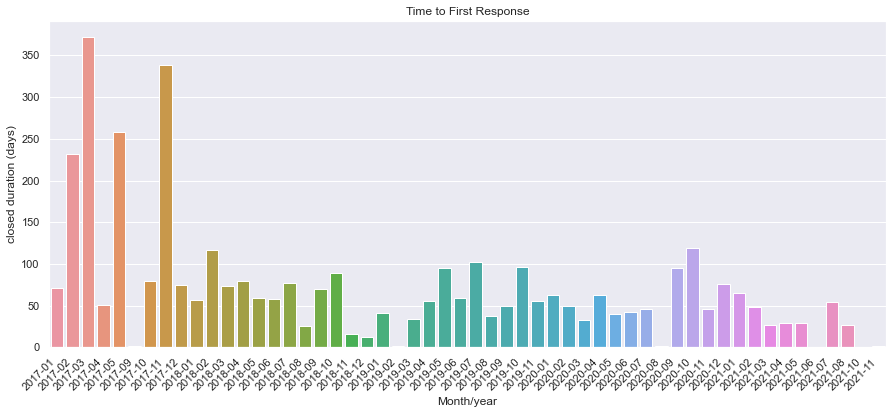

In [6]:
from requests import request
import json
from pandas.io.json import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from numpy import count_nonzero
import seaborn as sns
r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/issues-closed-resolution-duration?period=month', method='get');
e = r.json();
df=pd.DataFrame(e);
created= df['created_at'];
df[['created_at','diffdate']];
created = pd.to_datetime(df.created_at, format='%Y-%m-%d %H:%M:%S');
fig, ax = plt.subplots(figsize = (15,6));
fig = sns.barplot(x = "created_at", y = "diffdate", data = df ,ci = None, ax=ax);
ax.set(xlabel="Month/year", ylabel = "closed duration (days)", title = "Time to First Response");
x_dates = created.dt.strftime('%Y-%m').sort_values().unique();
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right');





## Community Culture


### Code of Conduct

In [7]:
import psycopg2
import pandas as pd 
import sqlalchemy as salc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
import json


warnings.filterwarnings('ignore')

with open("Config.json") as config_file:
    config = json.load(config_file)

database_connection_string = 'postgresql+psycopg2://{}:{}@{}:{}/{}'.format(config['user'], config['password'], config['host'], config['port'], config['database'])

dbschema='augur_data'
engine = salc.create_engine(
    database_connection_string,
    connect_args={'options': '-csearch_path={}'.format(dbschema)})


repolist = pd.DataFrame() 
coc = pd.DataFrame() 
coc_query = salc.sql.text(f""" select 
code_of_conduct_file , max(data_collection_date) as date from repo_info
where repo_id = 25440
group by code_of_conduct_file
""")

coc_data = pd.read_sql(coc_query, con=engine);
print(coc_data)

                                code_of_conduct_file                date
0  https://github.com/chaoss/augur/blob/main/CODE... 2021-12-07 23:59:52


### Inclusive Leadership

## Licensing

### License Covered

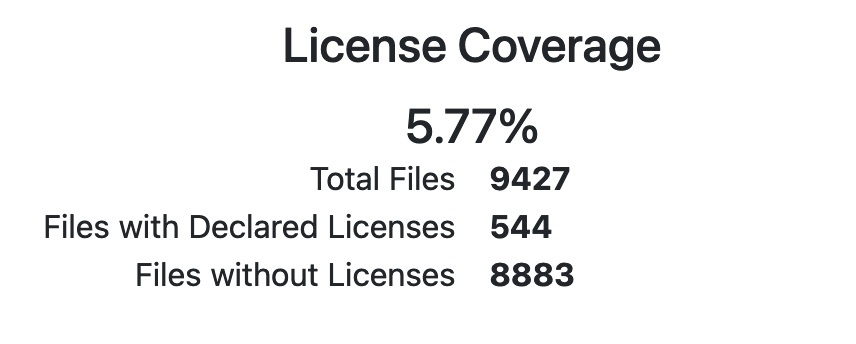

In [8]:
Image(filename='license.jpg', width=300) 

### Licenses Declared

In [9]:
# Augur Endpoint. We need to parse the data. 

## Stability

### CII Best Practices Badging Status

In [10]:
from termcolor import colored
r = requests.get('http://augur.chaoss.io/api/unstable/repo-groups/10/repos/25440/cii-best-practices-badge')
r.json()
#results = r.json()


[{'repo_name': 'augur',
  'id': 2788,
  'repo_url': 'https://github.com/chaoss/augur',
  'badge_level': 'passing',
  'tiered_percentage': 107,
  'achieve_silver_status': 'Unmet',
  'achieve_passing_status': 'Met'}]

### Test Coverage

### Bus Factor

### Committers

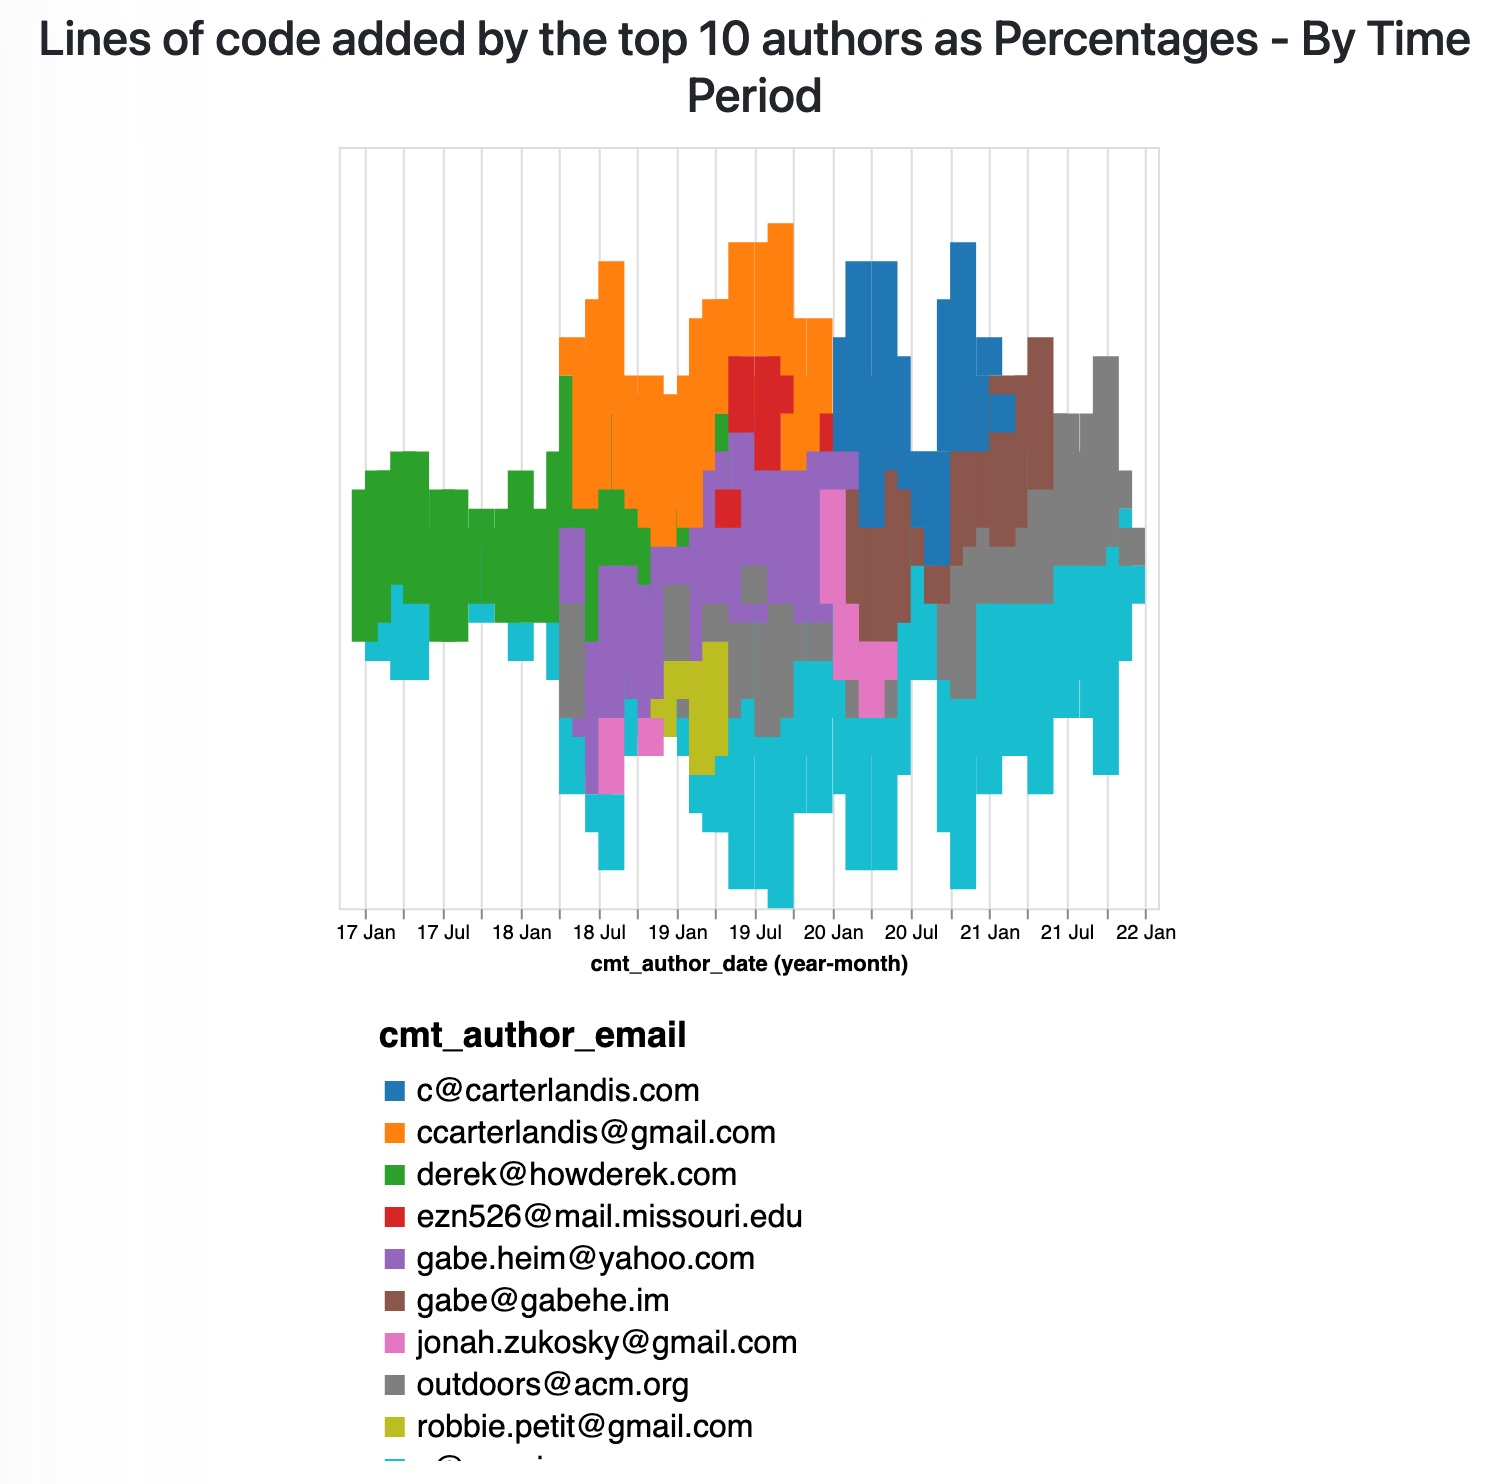

In [11]:
Image(filename='committers.jpg', width=600) 

## Code

### New Contributors


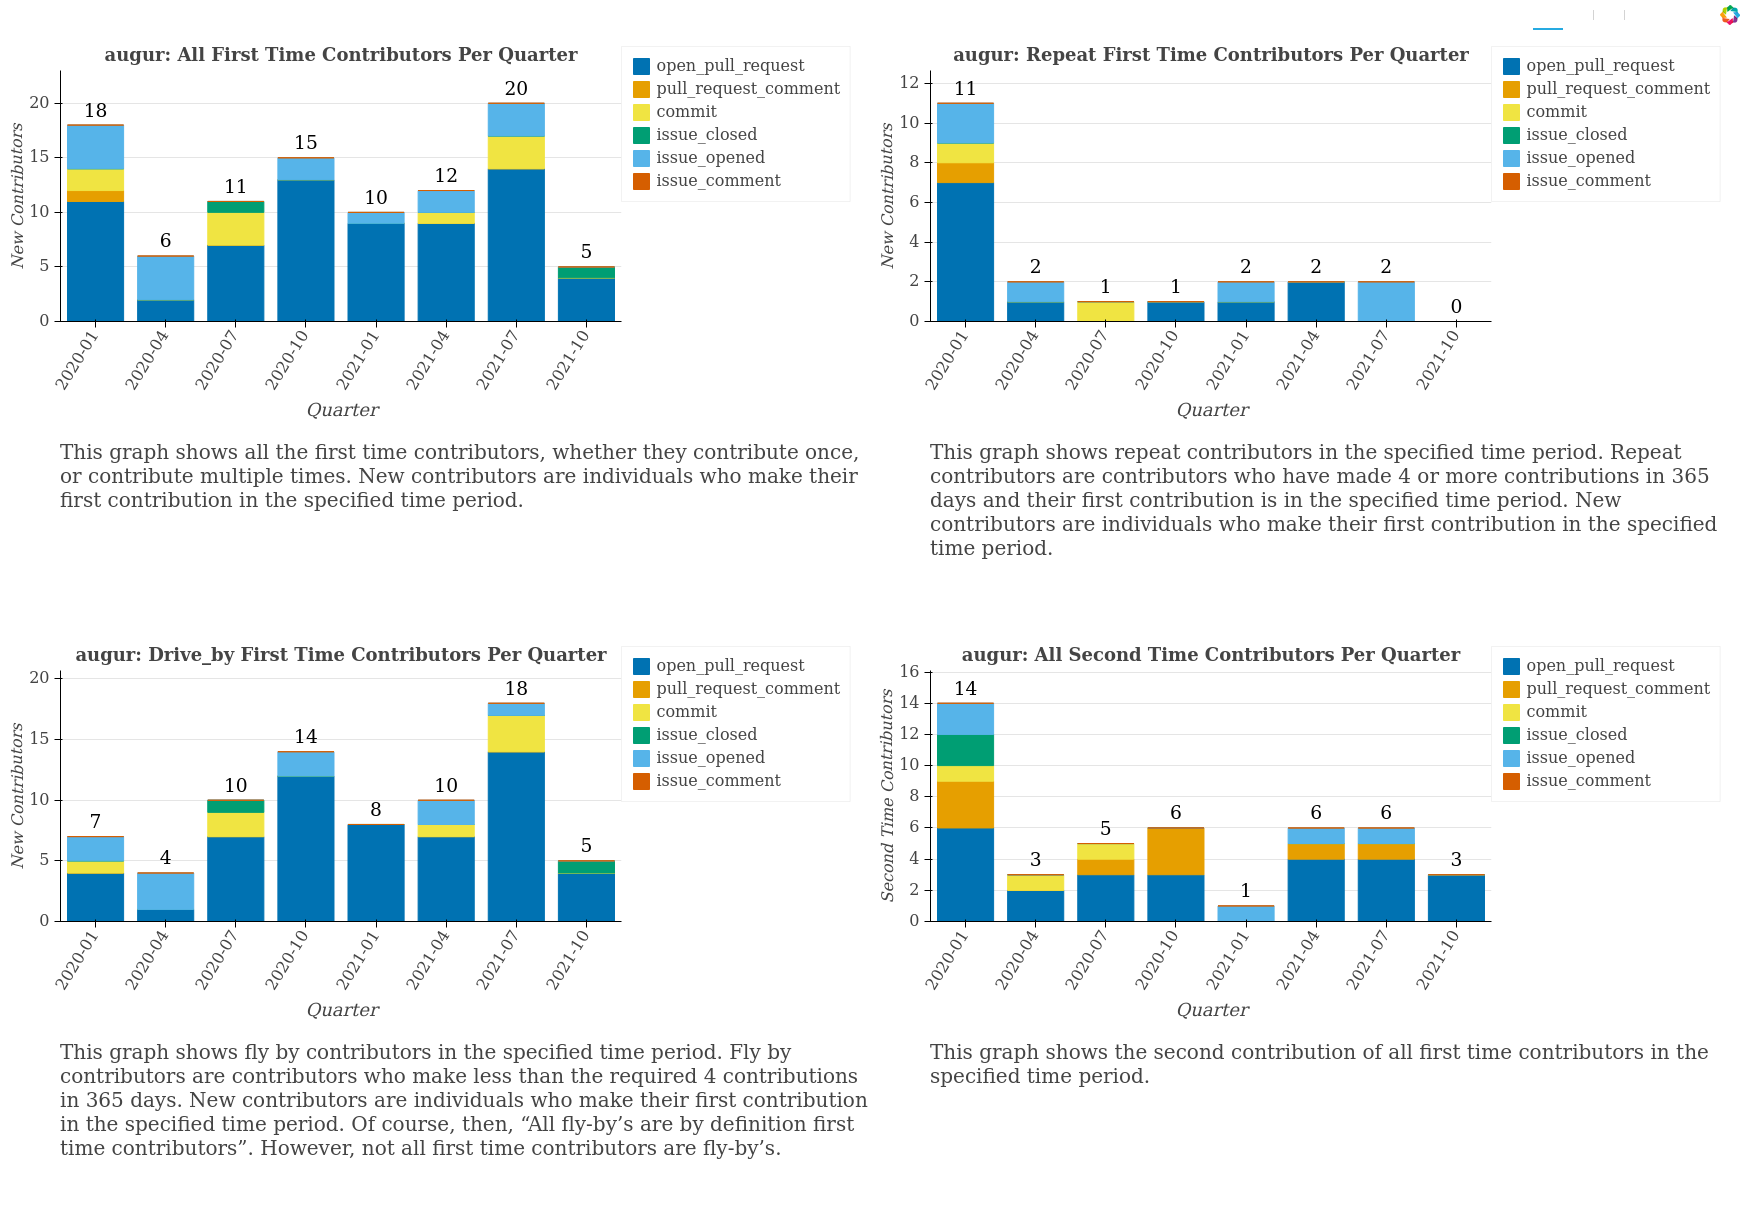

In [12]:
url = "http://augur.chaoss.io/api/unstable/contributor_reports/new_contributors_stacked_bar/?repo_id=25440"
payload = ""
querystring = {
        "api-version":"1.0",
        "format":"png",
        "layer":"basic"
    }
headers = {
    'cache-control': "no-cache"
    }

r = requests.get(url,data=payload, headers=headers, params=querystring, stream=all)

display(Image(r.content))

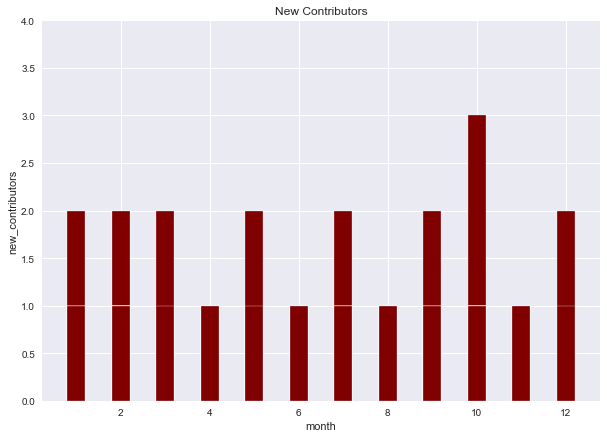

In [13]:
plt.style.use('seaborn')
r = requests.get('http://augur.chaoss.io/api/unstable/repos/25440/contributors-new')
data =r.json()
e = r.json()
e 
df=pd.DataFrame(e)
# df['date'] = pd.to_datetime(df['date'])

df['date'] = pd.DatetimeIndex(df['date']).month
df.sort_values('date', inplace=True)

date = df['date']
# print(df)
new_contributors = df['new_contributors']
fig = plt.figure(figsize = (10, 7
                            ))

plt.bar(date, new_contributors, color ='maroon',
        width = 0.4)
plt.title('New Contributors')
plt.xlabel('month')
plt.ylabel('new_contributors')
plt.ylim([0, 4])


plt.show()


### Change Request Acceptance Rates

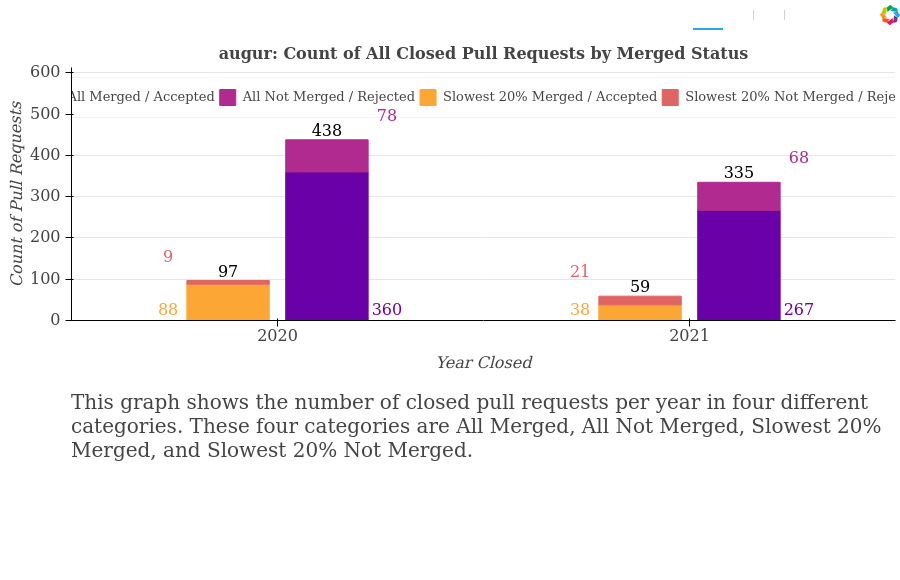

In [14]:
url = "http://augur.chaoss.io/api/unstable/pull_request_reports/PR_counts_by_merged_status?repo_id=25440"
payload = ""
querystring = {
        "api-version":"1.0",
        "format":"png",
        "layer":"basic"
    }
headers = {
    'cache-control': "no-cache"
    }

r = requests.get(url,data=payload, headers=headers, params=querystring, stream=all)

display(Image(r.content))

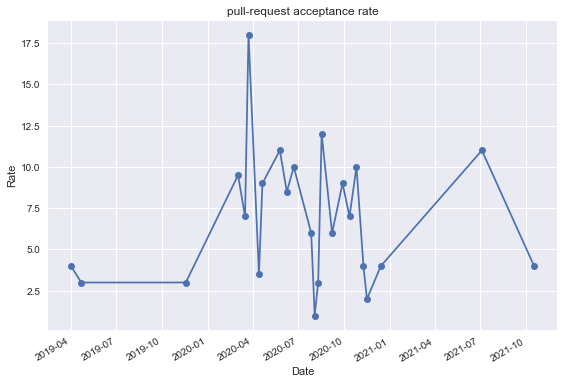

In [15]:
plt.style.use('seaborn')

r=request(url='http://augur.chaoss.io/api/unstable/repos/25440/pull-request-acceptance-rate', method='get')

e = r.json()
e 
df=pd.DataFrame(e)
# print(df)

df['date'] = pd.to_datetime(df['date'])
# df['Month'] = pd.DatetimeIndex(df['Month']).month
df.sort_values('date', inplace=True)

date = df['date']
rate = df['rate']

plt.plot_date(date, rate, linestyle='solid')

plt.gcf().autofmt_xdate()

plt.title('pull-request acceptance rate')
plt.xlabel('Date')
plt.ylabel('Rate')

plt.tight_layout()

plt.show()